In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics
import tensorflow

In [186]:
import os
base_dir='../data/chest_xray/'
train_pneumonia=os.listdir('../data/chest_xray/train/PNEUMONIA/')

train_normal=os.listdir('../data/chest_xray/train/NORMAL/')

val_dir_normal=os.listdir('../data/chest_xray/val/NORMAL/')

test_dir_normal=os.listdir('../data/chest_xray/test/NORMAL/')

val_dir_pneumonia=os.listdir('../data/chest_xray/val/PNEUMONIA/')

test_dir_pneumonia=os.listdir('../data/chest_xray/test/PNEUMONIA/')


In [187]:
print("Train set w/ pneumonia: ", len(train_pneumonia))
print("Train set normal: ", len(train_normal))
print("Validation set w/ pneumonia: ", len(val_dir_pneumonia))
print("Validation set normal: ", len(val_dir_normal))
print("Test set w/ pneumonia: ", len(test_dir_pneumonia))
print("Test set normal: ", len(test_dir_normal))


Train set w/ pneumonia:  2144
Train set normal:  699
Validation set w/ pneumonia:  1740
Validation set normal:  650
Test set w/ pneumonia:  390
Test set normal:  234


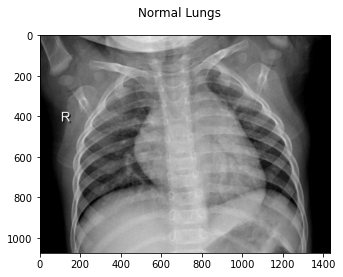

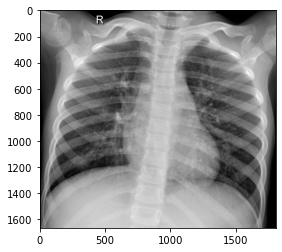

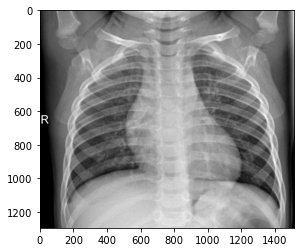

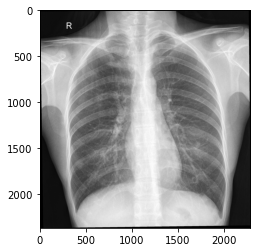

In [188]:
from keras.preprocessing.image import ImageDataGenerator, load_img
plt.suptitle('Normal Lungs')
for i in range(0,4):
    img = train_normal[i]
    img = load_img('../data/chest_xray/train/NORMAL/' + img)
    plt.imshow(img)
    plt.show()

In [189]:
from PIL import Image, ImageOps
im = Image.open('../data/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg')
im_flip = ImageOps.mirror(im)
im_flip.save('../data/chest_xray/val/PNEUMONIA/person1946_bacteria_4874_mirror.jpeg', quality=95)

In [190]:
for im in range(0, len(val_dir_pneumonia)):
    full = val_dir_pneumonia[im]
    print(full)
    split = val_dir_pneumonia[im]. split('.')
    print(split)
    img = Image.open('../data/chest_xray/val/PNEUMONIA/' + full)
    #print(img)
    img_mirror = ImageOps.mirror(img)
    img_mirror.save('../data/chest_xray/val/val_mirror/' + split[0] + 'mirror' + '.jpeg', quality=95)

person100_virus_184.jpeg
['person100_virus_184', 'jpeg']


FileNotFoundError: [Errno 2] No such file or directory: '../data/chest_xray/val/val_mirror/person100_virus_184mirror.jpeg'

In [43]:
def mirror_img(path_from, path_to, img_list):
    """Take a path to where images are located, a path to save transformed images 
    and the list of images to transform. Takes each image and returns the mirrored version of that image 
    with a new name marking its mirrored status"""
    for im in range(0, len(img_list)):
        full = img_list[im]
        print(full)
        split = img_list[im]. split('.')
        print(split)
        img = Image.open(path_from + full)
        img_mirror = ImageOps.mirror(img)
        img_mirror.save(path_to + split[0] + '_mirror' + '.jpeg', quality=95)

In [44]:
mirror_img('../data/chest_xray/val/PNEUMONIA/', '../data/chest_xray/val/val_mirror/', val_dir_pneumonia)

person1946_bacteria_4874.jpeg
['person1946_bacteria_4874', 'jpeg']
person1946_bacteria_4875.jpeg
['person1946_bacteria_4875', 'jpeg']
person1947_bacteria_4876.jpeg
['person1947_bacteria_4876', 'jpeg']
person1949_bacteria_4880.jpeg
['person1949_bacteria_4880', 'jpeg']
person1950_bacteria_4881.jpeg
['person1950_bacteria_4881', 'jpeg']
person1951_bacteria_4882.jpeg
['person1951_bacteria_4882', 'jpeg']
person1952_bacteria_4883.jpeg
['person1952_bacteria_4883', 'jpeg']
person1954_bacteria_4886.jpeg
['person1954_bacteria_4886', 'jpeg']


In [99]:
normal_img_arrays = []

for i in range(len(train_normal)):
    img = train_normal[i]
    img = load_img('../data/chest_xray/train/NORMAL/' + img)
    array = np.array(img)[:,:,0]
    normal_img_arrays.append(array)

In [100]:
normal_img_arrays[3].shape

(2363, 2288)

In [101]:

pneumonia_img_arrays = []

for i in range(len(train_pneumonia)):
    img = train_pneumonia[i]
    img = load_img('../data/chest_xray/train/PNEUMONIA/' + img)
    array = np.array(img)[:,:,0]
    pneumonia_img_arrays.append(array)

In [191]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('../data/chest_xray/train/',
                                                 target_size=(224, 224),
                                                 shuffle=True,
                                                 batch_size=50,
                                                 class_mode='binary')

val_set = train_datagen.flow_from_directory('../data/chest_xray/val/',
                                            target_size=(224, 224),
                                            shuffle=True,
                                            batch_size=50,
                                            class_mode='binary')

test_set = test_datagen.flow_from_directory('../data/chest_xray/test/',
                                            target_size=(224, 224),
                                            shuffle=True,
                                            batch_size=10,
                                            class_mode='binary')

Found 2843 images belonging to 2 classes.
Found 2390 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [192]:
model = Sequential()

In [193]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['categorical_accuracy'])

In [194]:
from keras.layers import Dense, Dropout, Flatten

In [195]:
model.add(Flatten())

In [196]:
history = model.fit_generator(training_set,
                    epochs=10,
                    validation_data=val_set)

Epoch 1/10
57/57 [==============================] - 51s 892ms/step - loss: 1.3226 - categorical_accuracy: 0.0056 - val_loss: 1.1883 - val_categorical_accuracy: 0.0017
Epoch 2/10
57/57 [==============================] - 50s 876ms/step - loss: 1.3226 - categorical_accuracy: 0.0056 - val_loss: 1.1883 - val_categorical_accuracy: 0.0017
Epoch 3/10
57/57 [==============================] - 50s 880ms/step - loss: 1.3226 - categorical_accuracy: 0.0056 - val_loss: 1.1883 - val_categorical_accuracy: 0.0017
Epoch 4/10
17/57 [=======>......................] - ETA: 18s - loss: 1.3201 - categorical_accuracy: 0.0047

KeyboardInterrupt: 

In [197]:
from keras import layers
from keras import models

## RMSprop(lr=1e-4) model

In [198]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [199]:
from keras import optimizers

In [200]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [201]:
history = model.fit(training_set, 
                              steps_per_epoch=10, 
                              epochs=5, 
                              validation_data=val_set, 
                              validation_steps=5)

Epoch 1/5
10/10 [==============================] - 20s 2s/step - loss: 3.9131 - acc: 0.5800 - val_loss: 0.5675 - val_acc: 0.6800
Epoch 2/5
10/10 [==============================] - 17s 2s/step - loss: 0.8884 - acc: 0.6920 - val_loss: 0.5666 - val_acc: 0.7440
Epoch 3/5
10/10 [==============================] - 18s 2s/step - loss: 1.0161 - acc: 0.7260 - val_loss: 0.7118 - val_acc: 0.7160
Epoch 4/5
10/10 [==============================] - 17s 2s/step - loss: 0.8938 - acc: 0.6820 - val_loss: 0.8206 - val_acc: 0.5360
Epoch 5/5
10/10 [==============================] - 18s 2s/step - loss: 0.5047 - acc: 0.8060 - val_loss: 0.3242 - val_acc: 0.8480


In [128]:
history.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x262cab9dfd0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [4.924973011016846,
   0.6925645470619202,
   0.5233540534973145,
   0.7485107183456421,
   0.5596080422401428],
  'acc': [0.5600000023841858,
   0.6740000247955322,
   0.8032454252243042,
   0.7179999947547913,
   0.7580000162124634],
  'val_loss': [-0.7566947340965271,
   -0.4904318153858185,
   -1.2278921604156494,
   -1.1522618532180786,
   -1.7027812004089355],
  'val_acc': [0.3479999899864197,
   0.4320000112056732,
   0.3440000116825104,
   0.3959999978542328,
   0.41999998688697815]},
 'params': {'verbose': 1, 'epochs': 5, 'steps': 10},
 'epoch': [0, 1, 2, 3, 4]}

ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

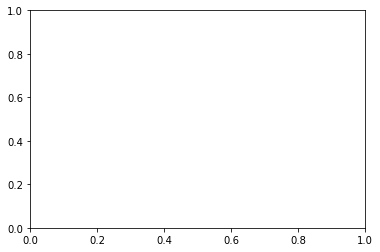

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline 

rms_acc = history.history['acc']
rms_val_acc = history.history['val_acc']
rms_loss = history.history['loss']
rms_val_loss = history.history['val_loss']
rms_epochs = range(len(acc))
plt.plot(rms_epochs, rms_acc, 'bo', label='Training acc')
plt.plot(rms_epochs, rms_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(rms_epochs, rms_loss, 'bo', label='Training loss')
plt.plot(rms_epochs, rms_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## adam Model

In [202]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tensorflow.keras.metrics.Recall()])


history = model.fit(training_set, 
                              steps_per_epoch=10, 
                              epochs=5, 
                              validation_data=val_set, 
                              validation_steps=5)



Epoch 1/5
10/10 [==============================] - 16s 2s/step - loss: 34.4854 - accuracy: 0.5240 - recall_12: 0.5838 - val_loss: 7.4769 - val_accuracy: 0.6920 - val_recall_12: 1.0000
Epoch 2/5
10/10 [==============================] - 14s 1s/step - loss: 2.1184 - accuracy: 0.7000 - recall_12: 0.8583 - val_loss: 0.7469 - val_accuracy: 0.4480 - val_recall_12: 0.2737
Epoch 3/5
10/10 [==============================] - 14s 1s/step - loss: 0.4665 - accuracy: 0.7900 - recall_12: 0.8625 - val_loss: 0.4513 - val_accuracy: 0.7360 - val_recall_12: 0.9725
Epoch 4/5
10/10 [==============================] - 14s 1s/step - loss: 0.2545 - accuracy: 0.8900 - recall_12: 0.9603 - val_loss: 0.2652 - val_accuracy: 0.9000 - val_recall_12: 0.9040
Epoch 5/5
10/10 [==============================] - 14s 1s/step - loss: 0.1635 - accuracy: 0.9480 - recall_12: 0.9631 - val_loss: 0.2402 - val_accuracy: 0.8920 - val_recall_12: 0.9769


Epoch 1/5
10/10 [==============================] - 13s 1s/step - loss: 22.2965 - accuracy: 0.6160 - recall_6: 0.7554 - val_loss: 8.3566 - val_accuracy: 0.7240 - val_recall_6: 1.0000
Epoch 2/5
10/10 [==============================] - 13s 1s/step - loss: 1.9414 - accuracy: 0.8020 - recall_6: 0.8740 - val_loss: 0.4007 - val_accuracy: 0.8280 - val_recall_6: 0.9572
Epoch 3/5
10/10 [==============================] - 13s 1s/step - loss: 0.2261 - accuracy: 0.9160 - recall_6: 0.9529 - val_loss: 0.3899 - val_accuracy: 0.8240 - val_recall_6: 0.9840
Epoch 4/5
10/10 [==============================] - 15s 2s/step - loss: 0.1999 - accuracy: 0.9300 - recall_6: 0.9599 - val_loss: 0.4282 - val_accuracy: 0.8120 - val_recall_6: 0.9885
Epoch 5/5
10/10 [==============================] - 14s 1s/step - loss: 0.1545 - accuracy: 0.9480 - recall_6: 0.9688 - val_loss: 0.2531 - val_accuracy: 0.9040 - val_recall_6: 0.9465

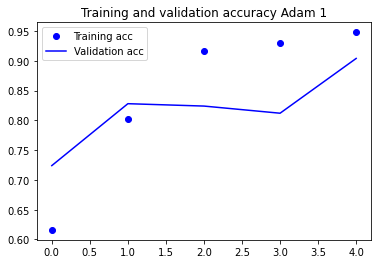

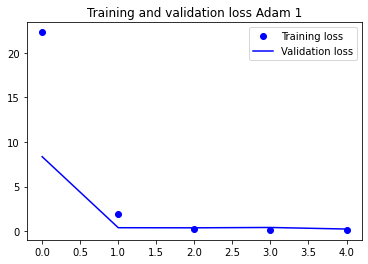

<Figure size 432x288 with 0 Axes>

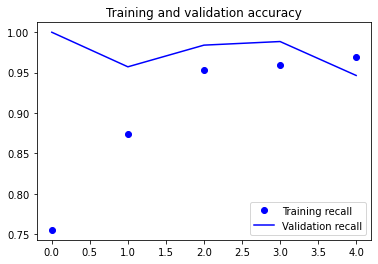

<Figure size 432x288 with 0 Axes>

In [171]:
adam1_acc = history.history['accuracy']
adam1_val_acc = history.history['val_accuracy']

adam1_loss = history.history['loss']
adam1_val_loss = history.history['val_loss']

adam1_rec = history.history['recall_6']
adam1_val_rec = history.history['val_recall_6']

adam1_epochs = range(len(adam1_acc))

plt.plot(adam1_epochs, adam1_acc, 'bo', label='Training acc')
plt.plot(adam1_epochs, adam1_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy Adam 1')
plt.legend()
plt.figure()

plt.plot(adam1_epochs, adam1_loss, 'bo', label='Training loss')
plt.plot(adam1_epochs, adam1_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss Adam 1')
plt.legend()
plt.show()

plt.plot(adam1_epochs, adam1_rec, 'bo', label='Training recall')
plt.plot(adam1_epochs, adam1_val_rec, 'b', label='Validation recall')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

## Adam model 2, 2nd layer

In [172]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tensorflow.keras.metrics.Recall()])


history = model.fit(training_set, 
                              steps_per_epoch=10, 
                              epochs=5, 
                              validation_data=val_set, 
                              validation_steps=5)

Epoch 1/5
10/10 [==============================] - 17s 2s/step - loss: 5.7690 - accuracy: 0.6120 - recall_7: 0.7053 - val_loss: 0.5855 - val_accuracy: 0.7120 - val_recall_7: 1.0000
Epoch 2/5
10/10 [==============================] - 17s 2s/step - loss: 0.4345 - accuracy: 0.8140 - recall_7: 0.9434 - val_loss: 0.3835 - val_accuracy: 0.8200 - val_recall_7: 0.8571
Epoch 3/5
10/10 [==============================] - 16s 2s/step - loss: 0.2594 - accuracy: 0.8940 - recall_7: 0.9372 - val_loss: 0.3611 - val_accuracy: 0.8240 - val_recall_7: 0.9167
Epoch 4/5
10/10 [==============================] - 16s 2s/step - loss: 0.1793 - accuracy: 0.9320 - recall_7: 0.9474 - val_loss: 0.2808 - val_accuracy: 0.8600 - val_recall_7: 0.8883
Epoch 5/5
10/10 [==============================] - 17s 2s/step - loss: 0.1393 - accuracy: 0.9460 - recall_7: 0.9652 - val_loss: 0.2139 - val_accuracy: 0.9120 - val_recall_7: 0.9714


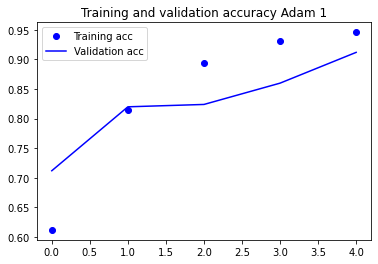

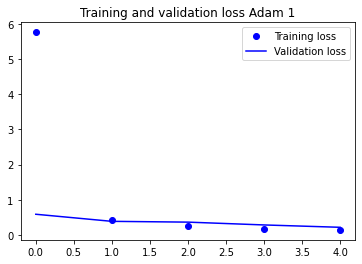

<Figure size 432x288 with 0 Axes>

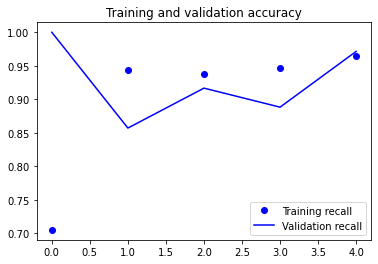

<Figure size 432x288 with 0 Axes>

In [173]:
adam2_acc = history.history['accuracy']
adam2_val_acc = history.history['val_accuracy']

adam2_loss = history.history['loss']
adam2_val_loss = history.history['val_loss']

adam2_rec = history.history['recall_7']
adam2_val_rec = history.history['val_recall_7']

adam2_epochs = range(len(adam2_acc))

plt.plot(adam2_epochs, adam2_acc, 'bo', label='Training acc')
plt.plot(adam2_epochs, adam2_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy Adam 1')
plt.legend()
plt.figure()

plt.plot(adam2_epochs, adam2_loss, 'bo', label='Training loss')
plt.plot(adam2_epochs, adam2_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss Adam 1')
plt.legend()
plt.show()

plt.plot(adam2_epochs, adam2_rec, 'bo', label='Training recall')
plt.plot(adam2_epochs, adam2_val_rec, 'b', label='Validation recall')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

## adam model 3, model.fit rework, 12, 8, 8

In [174]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tensorflow.keras.metrics.Recall()])


history = model.fit(training_set, 
                              steps_per_epoch=12, 
                              epochs=8, 
                              validation_data=val_set, 
                              validation_steps=8)

Epoch 1/8
12/12 [==============================] - 20s 2s/step - loss: 4.5024 - accuracy: 0.6833 - recall_8: 0.7763 - val_loss: 0.4663 - val_accuracy: 0.7575 - val_recall_8: 0.9519
Epoch 2/8
12/12 [==============================] - 20s 2s/step - loss: 0.3939 - accuracy: 0.8128 - recall_8: 0.9095 - val_loss: 0.5016 - val_accuracy: 0.7750 - val_recall_8: 0.9375
Epoch 3/8
12/12 [==============================] - 21s 2s/step - loss: 0.2256 - accuracy: 0.9050 - recall_8: 0.9425 - val_loss: 0.2905 - val_accuracy: 0.8775 - val_recall_8: 0.9007
Epoch 4/8
12/12 [==============================] - 22s 2s/step - loss: 0.1459 - accuracy: 0.9517 - recall_8: 0.9610 - val_loss: 0.3160 - val_accuracy: 0.8675 - val_recall_8: 0.9733
Epoch 5/8
12/12 [==============================] - 22s 2s/step - loss: 0.1557 - accuracy: 0.9494 - recall_8: 0.9686 - val_loss: 0.1515 - val_accuracy: 0.9325 - val_recall_8: 0.9507
Epoch 6/8
12/12 [==============================] - 23s 2s/step - loss: 0.1316 - accuracy: 0.943

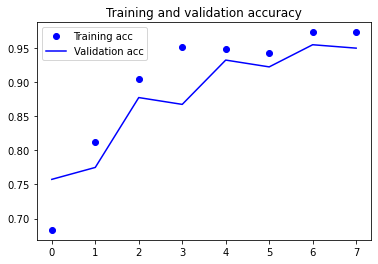

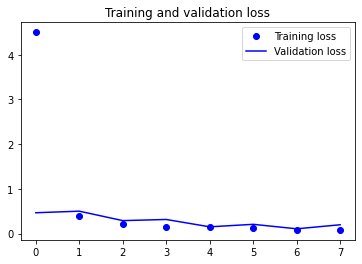

<Figure size 432x288 with 0 Axes>

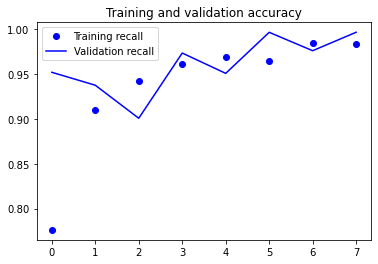

<Figure size 432x288 with 0 Axes>

In [176]:
adam3_acc = history.history['accuracy']
adam3_val_acc = history.history['val_accuracy']

adam3_loss = history.history['loss']
adam3_val_loss = history.history['val_loss']

adam3_rec = history.history['recall_8']
adam3_val_rec = history.history['val_recall_8']

adam3_epochs = range(len(adam3_acc))

plt.plot(adam3_epochs, adam3_acc, 'bo', label='Training acc')
plt.plot(adam3_epochs, adam3_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(adam3_epochs, adam3_loss, 'bo', label='Training loss')
plt.plot(adam3_epochs, adam3_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.plot(adam3_epochs, adam3_rec, 'bo', label='Training recall')
plt.plot(adam3_epochs, adam3_val_rec, 'b', label='Validation recall')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

## adam model 4, model.fit rework, 15, 10, 10

In [177]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tensorflow.keras.metrics.Recall()])


history = model.fit(training_set, 
                              steps_per_epoch=15, 
                              epochs=10, 
                              validation_data=val_set, 
                              validation_steps=10)

Epoch 1/10
15/15 [==============================] - 26s 2s/step - loss: 3.0802 - accuracy: 0.6581 - recall_9: 0.7256 - val_loss: 0.4012 - val_accuracy: 0.8420 - val_recall_9: 0.8635
Epoch 2/10
15/15 [==============================] - 26s 2s/step - loss: 0.2683 - accuracy: 0.8880 - recall_9: 0.9217 - val_loss: 0.2870 - val_accuracy: 0.8780 - val_recall_9: 0.9086
Epoch 3/10
15/15 [==============================] - 28s 2s/step - loss: 0.1857 - accuracy: 0.9280 - recall_9: 0.9457 - val_loss: 0.2477 - val_accuracy: 0.9080 - val_recall_9: 0.9863
Epoch 4/10
15/15 [==============================] - 28s 2s/step - loss: 0.1894 - accuracy: 0.9267 - recall_9: 0.9558 - val_loss: 0.3147 - val_accuracy: 0.8680 - val_recall_9: 0.9551
Epoch 5/10
15/15 [==============================] - 27s 2s/step - loss: 0.1129 - accuracy: 0.9547 - recall_9: 0.9675 - val_loss: 0.2278 - val_accuracy: 0.9120 - val_recall_9: 0.9693
Epoch 6/10
15/15 [==============================] - 26s 2s/step - loss: 0.0853 - accuracy:

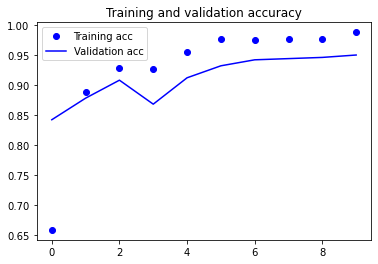

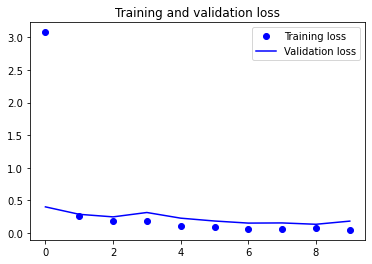

<Figure size 432x288 with 0 Axes>

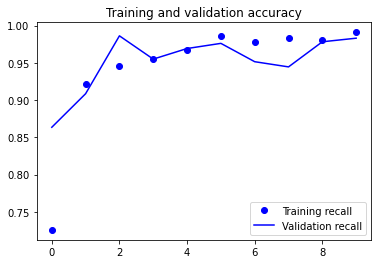

<Figure size 432x288 with 0 Axes>

In [178]:
adam4_acc = history.history['accuracy']
adam4_val_acc = history.history['val_accuracy']

adam4_loss = history.history['loss']
adam4_val_loss = history.history['val_loss']

adam4_rec = history.history['recall_9']
adam4_val_rec = history.history['val_recall_9']

adam4_epochs = range(len(adam4_acc))

plt.plot(adam4_epochs, adam4_acc, 'bo', label='Training acc')
plt.plot(adam4_epochs, adam4_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(adam4_epochs, adam4_loss, 'bo', label='Training loss')
plt.plot(adam4_epochs, adam4_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


plt.plot(adam4_epochs, adam4_rec, 'bo', label='Training recall')
plt.plot(adam4_epochs, adam4_val_rec, 'b', label='Validation recall')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

## SGD Model

In [179]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy', tensorflow.keras.metrics.Recall()])


history = model.fit(training_set, 
                              steps_per_epoch=10, 
                              epochs=5, 
                              validation_data=test_set, 
                              validation_steps=5)

Epoch 1/5
10/10 [==============================] - 12s 1s/step - loss: 0.8836 - accuracy: 0.6917 - recall_10: 0.8922 - val_loss: 0.7620 - val_accuracy: 0.5600 - val_recall_10: 1.0000
Epoch 2/5
10/10 [==============================] - 11s 1s/step - loss: 0.5258 - accuracy: 0.7700 - recall_10: 1.0000 - val_loss: 0.7151 - val_accuracy: 0.6400 - val_recall_10: 1.0000
Epoch 3/5
10/10 [==============================] - 11s 1s/step - loss: 0.5120 - accuracy: 0.7600 - recall_10: 1.0000 - val_loss: 0.5973 - val_accuracy: 0.6200 - val_recall_10: 1.0000
Epoch 4/5
10/10 [==============================] - 12s 1s/step - loss: 0.4619 - accuracy: 0.7860 - recall_10: 0.9680 - val_loss: 0.7070 - val_accuracy: 0.7000 - val_recall_10: 1.0000
Epoch 5/5
10/10 [==============================] - 12s 1s/step - loss: 0.4228 - accuracy: 0.8340 - recall_10: 0.9946 - val_loss: 0.5063 - val_accuracy: 0.8200 - val_recall_10: 1.0000


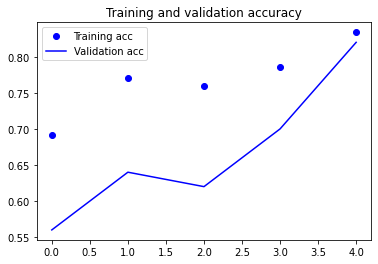

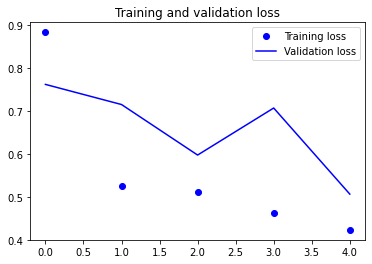

<Figure size 432x288 with 0 Axes>

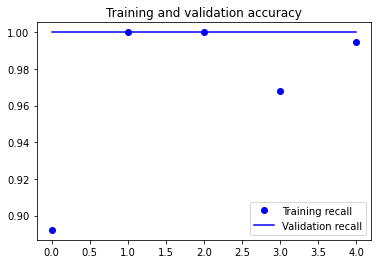

<Figure size 432x288 with 0 Axes>

In [180]:
sgd1_acc = history.history['accuracy']
sgd1_val_acc = history.history['val_accuracy']

sgd1_loss = history.history['loss']
sgd1_val_loss = history.history['val_loss']

sgd1_rec = history.history['recall_10']
sgd1_val_rec = history.history['val_recall_10']

sgd1_epochs = range(len(sgd1_acc))

plt.plot(sgd1_epochs, sgd1_acc, 'bo', label='Training acc')
plt.plot(sgd1_epochs, sgd1_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(sgd1_epochs, sgd1_loss, 'bo', label='Training loss')
plt.plot(sgd1_epochs, sgd1_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


plt.plot(sgd1_epochs, sgd1_rec, 'bo', label='Training recall')
plt.plot(sgd1_epochs, sgd1_val_rec, 'b', label='Validation recall')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

## SGD model 2 more layers

In [182]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.Recall()])


history = model.fit(training_set, 
                              steps_per_epoch=10, 
                              epochs=5, 
                              validation_data=test_set, 
                              validation_steps=5)

Epoch 1/5
10/10 [==============================] - 14s 1s/step - loss: 0.5515 - accuracy: 0.7860 - recall_11: 1.0000 - val_loss: 0.7760 - val_accuracy: 0.6600 - val_recall_11: 1.0000
Epoch 2/5
10/10 [==============================] - 13s 1s/step - loss: 0.5698 - accuracy: 0.6755 - recall_11: 0.8944 - val_loss: 0.6533 - val_accuracy: 0.6000 - val_recall_11: 1.0000
Epoch 3/5
10/10 [==============================] - 13s 1s/step - loss: 0.4719 - accuracy: 0.7880 - recall_11: 1.0000 - val_loss: 0.6864 - val_accuracy: 0.6000 - val_recall_11: 1.0000
Epoch 4/5
10/10 [==============================] - 14s 1s/step - loss: 0.4977 - accuracy: 0.7840 - recall_11: 0.9605 - val_loss: 0.6175 - val_accuracy: 0.6600 - val_recall_11: 1.0000
Epoch 5/5
10/10 [==============================] - 14s 1s/step - loss: 0.4332 - accuracy: 0.8100 - recall_11: 0.9738 - val_loss: 1.0418 - val_accuracy: 0.6000 - val_recall_11: 1.0000


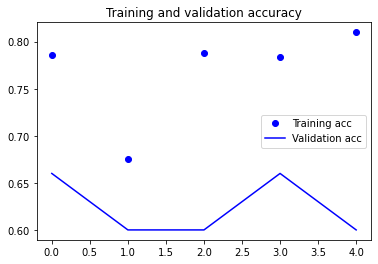

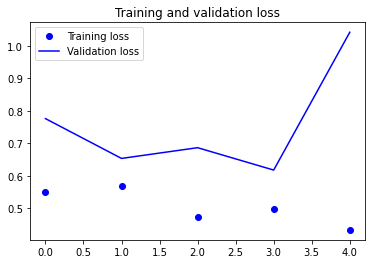

<Figure size 432x288 with 0 Axes>

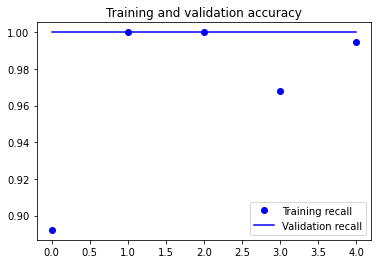

<Figure size 432x288 with 0 Axes>

In [184]:
sgd2_acc = history.history['accuracy']
sgd2_val_acc = history.history['val_accuracy']

sgd2_loss = history.history['loss']
sgd2_val_loss = history.history['val_loss']

sgd2_rec = history.history['recall_11']
sgd2_val_rec = history.history['val_recall_11']

sgd2_epochs = range(len(sgd2_acc))

plt.plot(sgd2_epochs, sgd2_acc, 'bo', label='Training acc')
plt.plot(sgd2_epochs, sgd2_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(sgd2_epochs, sgd2_loss, 'bo', label='Training loss')
plt.plot(sgd2_epochs, sgd2_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


plt.plot(sgd1_epochs, sgd1_rec, 'bo', label='Training recall')
plt.plot(sgd1_epochs, sgd1_val_rec, 'b', label='Validation recall')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()